# Plot representation

In [2]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('snpe_RNN_2p2r5k.csv',index_col=0)
df2 = pd.read_csv('cnn1_2r5k2p.csv',index_col=0)

labelling_dictionary = {f'{char}{num}': f'${char}_{num}$' for char in ['k', 'a', 'g', 'n', 'b', 'dm', 'dp'] for num in range(1, 4)}
df1[''] = 'RNN'
df2[''] = "CNN"

true_vals = [
    246.96291990024542, 246.96291990024542, 246.96291990024542,
    24.78485282457379, 24.78485282457379, 24.78485282457379,
    0.024884149937163258, 0.024884149937163258, 0.024884149937163258,
    5, 5, 5,
    33.82307682700831, 33.82307682700831, 33.82307682700831,
    1.143402097500176, 1.143402097500176, 1.143402097500176,
    0.7833664565550977, 0.7833664565550977, 0.7833664565550977
]

df_joint = pd.concat([df1,df2])
df_joint[''] = df_joint[''].astype(str)



In [7]:
df_joint.columns[1]

'k2'

In [ ]:
fig, ax = plt.subplots(int(num_col/2), 3, figsize=(15, 5*num_col/3))

/tmp/ipykernel_853386/1131026763.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = fig.legend(legends, labels=["RNN", "CNN"], fontsize = "12", loc='upper center', ncol =2, bbox_to_anchor = [0.5, -0.01])


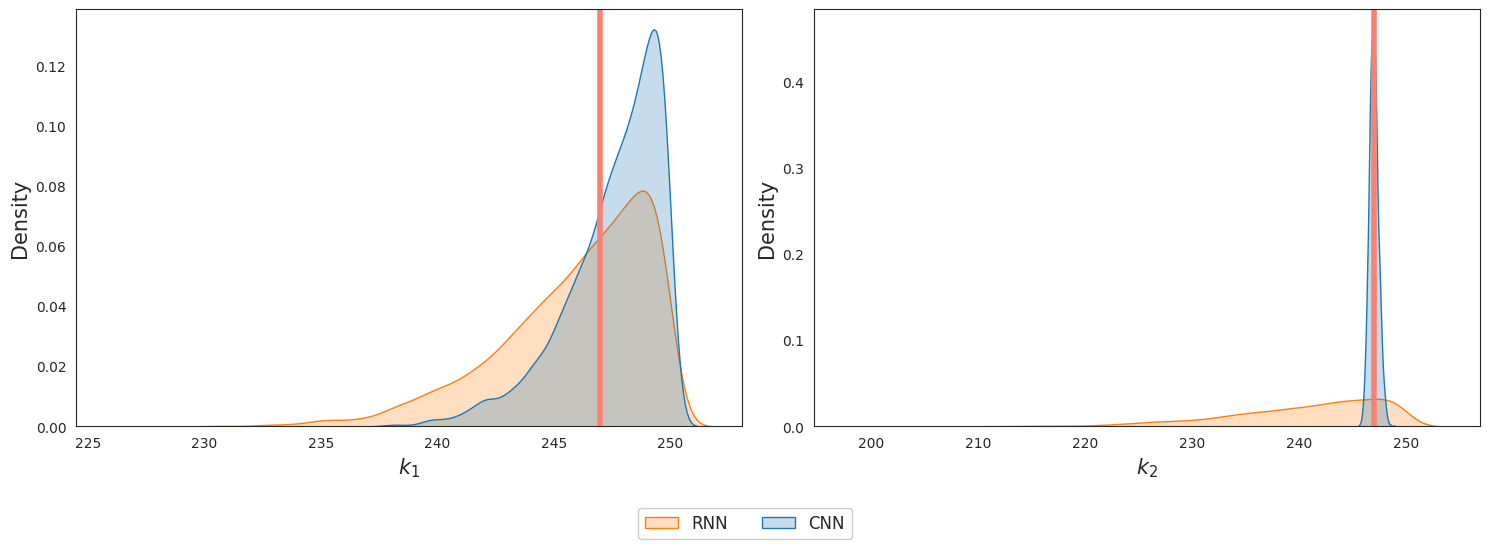

In [10]:
def contour_compare(df, labelling_dictionary):
    num_col = df.shape[1] - 1
    fig, ax = plt.subplots(int(num_col/2), 2, figsize=(15, 5*num_col/2))
    legends = []  # List to store legends
    for i in range(num_col):
        sns.set_style("white")
        sns.kdeplot(data=df, x=df.columns[i], ax=ax[i], hue='', fill=True)
        ax[i].axvline(true_vals[i], color='salmon', linewidth=4)
        ax[i].set_ylabel("Density", fontsize = "15")
        ax[i].set_xlabel(labelling_dictionary[df.columns[i]], fontsize = "15")
        ax[i].get_legend().set_visible(False)
    legend = fig.legend(legends, labels=["RNN", "CNN"], fontsize = "12", loc='upper center', ncol =2, bbox_to_anchor = [0.5, -0.01])
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0, 0))
    plt.tight_layout()
    plt.show()
contour_compare(df_joint, labelling_dictionary)

In [18]:
df1plot = df1.iloc[:,0:2]
df1plot

,k1,k2
0,249.62657,246.67073
1,243.60655,247.28468
2,247.94438,246.84717
3,248.98044,246.31958
4,247.65980,246.79364
...,...,...
4995,245.36090,247.26990
4996,245.49164,246.72090
4997,246.40132,246.75377
4998,248.17282,246.68008


In [3]:
#load everything
ss_2p = pd.read_csv('ss_nonorm_2p2r5k.csv',index_col=0)
rnn_2p = pd.read_csv('snpe_RNN_2p2r5k.csv',index_col=0)
flat_2p = pd.read_csv('flat5k2p2r.csv',index_col=0)
cnn1_2p = pd.read_csv('cnn1_2r5k2p.csv',index_col=0) #careful might need to discard last column
ss_2p[''] = 'SS'
rnn_2p[''] = "RNN"
cnn1_2p[''] = "CNN"
flat_2p[''] = "flat"

true_vals = [
    246.96291990024542, 246.96291990024542, 246.96291990024542,
    24.78485282457379, 24.78485282457379, 24.78485282457379,
    0.024884149937163258, 0.024884149937163258, 0.024884149937163258,
    5, 5, 5,
    33.82307682700831, 33.82307682700831, 33.82307682700831,
    1.143402097500176, 1.143402097500176, 1.143402097500176,
    0.7833664565550977, 0.7833664565550977, 0.7833664565550977
]

df_joint_dense = pd.concat([ss_2p, rnn_2p, cnn1_2p, flat_2p])
df_joint_dense[''] = df_joint_dense[''].astype(str)

In [24]:
df_joint_dense

,k1,k2,
0,247.72943,244.85617,SS
1,249.30843,245.42525,SS
2,248.00267,244.62361,SS
3,249.91367,245.72920,SS
4,249.84512,245.44992,SS
...,...,...,...
4995,249.34800,246.77681,flat
4996,249.30998,245.56683,flat
4997,249.40674,245.14058,flat
4998,248.94888,248.45851,flat


Text(0, 0.5, '$k_2$')

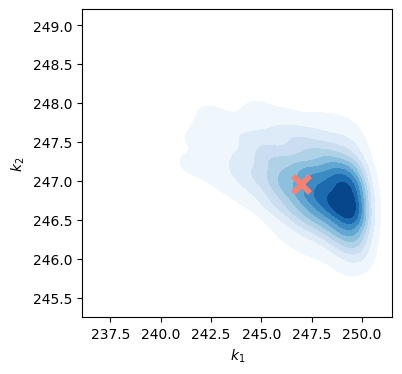

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(4,4))
sns.kdeplot(x=rnn_2p.iloc[:,0], y=rnn_2p.iloc[:,1], ax=axes, cmap="Blues", fill=True)
axes.scatter(x=true_vals[0],y=true_vals[1], marker="x", s=150, color="salmon",linewidths=4)
axes.set_xlabel(r"$k_1$")
axes.set_ylabel(r"$k_2$")

Text(0, 0.5, '$k_2$')

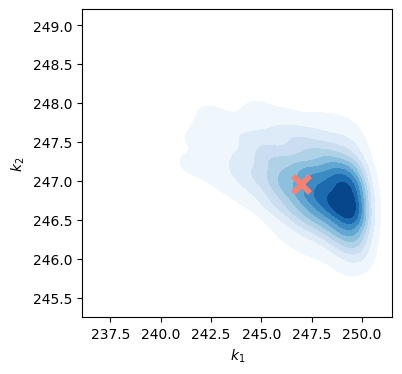

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(4,4))
sns.kdeplot(x=cnn1_2p.iloc[:,0], y=cnn1_2p.iloc[:,1], ax=axes, cmap="Blues", fill=True)
axes.scatter(x=true_vals[0],y=true_vals[1], marker="x", s=150, color="salmon",linewidths=4)
axes.set_xlabel(r"$k_1$")
axes.set_ylabel(r"$k_2$")

Text(0, 0.5, '$k_2$')

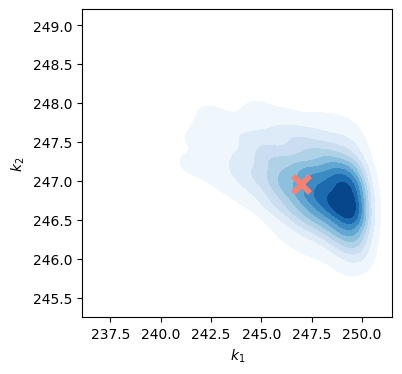

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(4,4))
sns.kdeplot(x=ss_2p.iloc[:,0], y=ss_2p.iloc[:,1], ax=axes, cmap="Blues", fill=True)
axes.scatter(x=true_vals[0],y=true_vals[1], marker="x", s=150, color="salmon",linewidths=4)
axes.set_xlabel(r"$k_1$")
axes.set_ylabel(r"$k_2$")

Text(0, 0.5, '$k_2$')

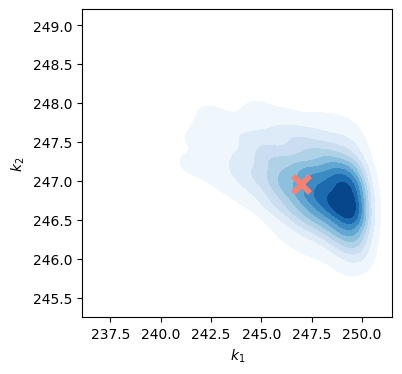

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(4,4))
sns.kdeplot(x=flat_2p.iloc[:,0], y=flat_2p.iloc[:,1], ax=axes, cmap="Blues", fill=True)
axes.scatter(x=true_vals[0],y=true_vals[1], marker="x", s=150, color="salmon",linewidths=4)
axes.set_xlabel(r"$k_1$")
axes.set_ylabel(r"$k_2$")

Text(0, 0.5, '$k_2$')

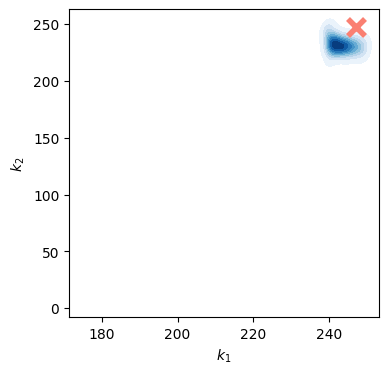

In [22]:
cnn2_2p = pd.read_csv('cnn2_2r5k2p.csv',index_col=0)
fig, axes = plt.subplots(1, 1, figsize=(4,4))
sns.kdeplot(x=cnn2_2p.iloc[:,0], y=cnn2_2p.iloc[:,1], ax=axes, cmap="Blues", fill=True)
axes.scatter(x=true_vals[0],y=true_vals[1], marker="x", s=150, color="salmon",linewidths=4)
axes.set_xlabel(r"$k_1$")
axes.set_ylabel(r"$k_2$")

Text(0, 0.5, '$k_2$')

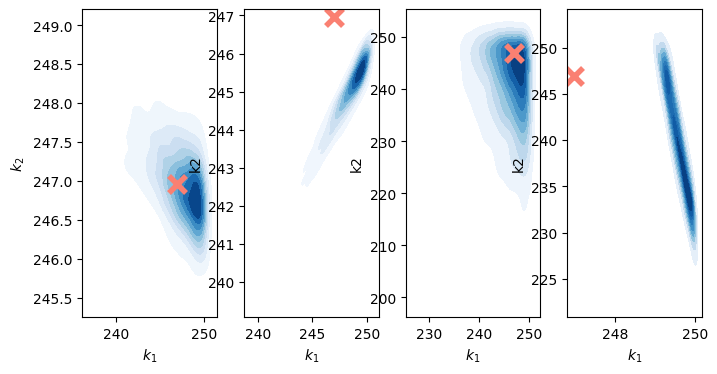

In [20]:
models = [rnn_2p, ss_2p, cnn1_2p, flat_2p]
fig, axes = plt.subplots(1, 4, figsize=(8,4))
for i, model in enumerate(models):
    sns.kdeplot(x=model.iloc[:,0], y=model.iloc[:,1], ax=axes[i], cmap="Blues", fill=True)
    axes[i].scatter(x=true_vals[0],y=true_vals[1], marker="x", s=150, color="salmon",linewidths=4)
    axes[i].set_xlabel(r"$k_1$")
axes[0].set_ylabel(r"$k_2$")

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(4,4))
sns.kdeplot(x=rnn_2p.iloc[:,0], y=rnn_2p.iloc[:,1], ax=axes, cmap="Blues", fill=True)
axes.scatter(x=true_vals[0],y=true_vals[1], marker="x", s=150, color="salmon",linewidths=4)
axes.set_xlabel(r"$k_1$")
axes.set_ylabel(r"$k_2$")

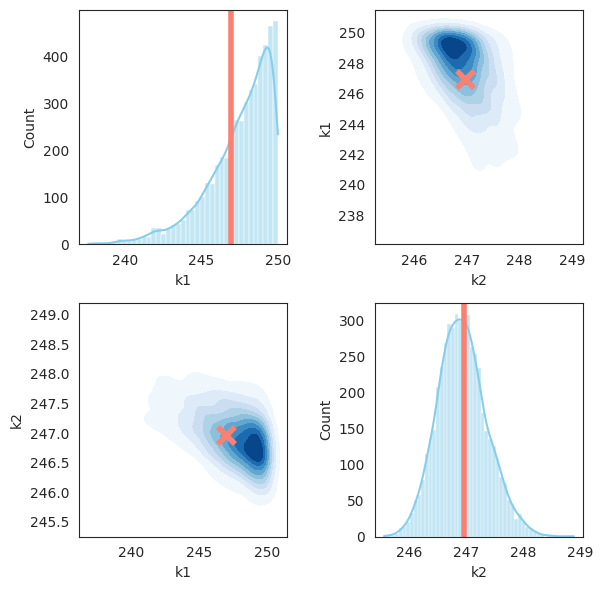

In [19]:
def pairplot(params,true_vals):
    num_params=np.shape(params)[1] -1
    fig, ax = plt.subplots(num_params, num_params, figsize=(num_params*3, num_params*3))
    sns.set_style("white")
    for i in range(num_params):
        for j in range(num_params):
            if i != j:
                sns.kdeplot(x=params.iloc[:, j], y=params.iloc[:, i], ax=ax[i, j], cmap="Blues", fill=True)
                ax[i, j].scatter(x=true_vals[j],y=true_vals[i], marker="x", s=150, color="salmon",linewidths=4)
                ax[i, j].set_ylabel(params.columns[i])
            else:
                sns.histplot(params.iloc[:, i], ax=ax[i, j], kde=True, color="skyblue")
                ax[i, j].axvline(true_vals[i], color="salmon",linewidth=4)
            ax[i, j].set_xlabel(params.columns[j])
            #ax[i, j].set_title(params.columns[i])
    plt.tight_layout()
    plt.show()

pairplot(df1, true_vals[0:2])